In [3]:
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
orders = pd.read_csv('Orders_Central.csv', encoding = "ISO-8859-1", engine='python')

In [7]:
orders.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sales,Quantity,Profit,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day,Discounts
0,15,US-2016-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,...,68.810,5,-123.8580,2016,11,22,2016,11,26,0.8
1,16,US-2016-118983,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,...,2.544,3,-3.8160,2016,11,22,2016,11,26,0.8
2,17,CA-2015-105893,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711,...,665.880,6,13.3176,2015,11,11,2015,11,18,None
3,22,CA-2017-137330,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,...,19.460,7,5.0596,2017,12,9,2017,12,13,None
4,23,CA-2017-137330,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,Nebraska,68025,...,60.340,7,15.6884,2017,12,9,2017,12,13,None


In [47]:
orders.describe()

,Row ID,Postal Code,Sales,Quantity,Profit,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
count,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000,2323.000000
mean,5030.547998,65340.572536,215.772661,3.779595,17.092709,2016.728799,7.692639,15.428325,2016.749462,7.566078,15.759363
std,2923.638538,11427.949045,632.779010,2.160561,291.487465,1.126599,3.347807,8.840895,1.132517,3.403310,8.785179
min,15.000000,46060.000000,0.444000,1.000000,-3701.892800,2015.000000,1.000000,1.000000,2015.000000,1.000000,1.000000
25%,2564.500000,55125.000000,14.620000,2.000000,-5.664300,2016.000000,5.000000,8.000000,2016.000000,5.000000,8.000000
50%,5029.000000,65203.000000,45.980000,3.000000,5.184000,2017.000000,8.000000,15.000000,2017.000000,8.000000,16.000000
75%,7612.500000,77041.000000,200.012000,5.000000,22.456200,2018.000000,11.000000,23.000000,2018.000000,11.000000,24.000000
max,9984.000000,79907.000000,17499.950000,14.000000,8399.976000,2018.000000,12.000000,31.000000,2019.000000,12.000000,31.000000


In [50]:
orders.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Product ID',
       'Category', 'Sub-Category', 'Product', 'Sales', 'Quantity', 'Profit',
       'Order Year', 'Order Month', 'Order Day', 'Ship Year', 'Ship Month',
       'Ship Day', 'Discounts'],
      dtype='object')

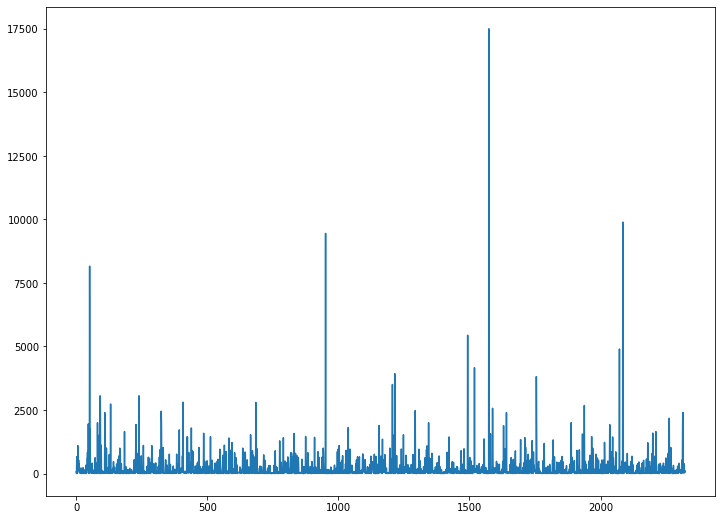

In [15]:
plt.figure(figsize=(12,9))
plt.plot(orders.Sales)
plt.show()

In [16]:
pyo.plot([{
    'x':orders.index,
    'y':orders.Sales
}])

'temp-plot.html'

In [17]:
orders_sf = orders[['Sales','Profit']]

In [19]:
pyo.plot([{
    'x': orders_sf.index,
    'y': orders_sf[col],
    'name': col
} for col in orders_sf.columns])

'temp-plot.html'

In [20]:
import plotly.graph_objs as go

In [30]:
pyo.plot([
    go.Scatter(
        x = orders_sf.Sales,
        y = orders_sf.Profit,
        mode = 'markers',
    )
])

'temp-plot.html'

In [32]:
data = [go.Scatter(
        x = orders_sf.Sales,
        y = orders_sf.Profit,
        mode = 'markers',
    )]

In [41]:
layout = go.Layout(
title='Sales vs Profit Chart',
xaxis=dict(title='Sales'),
yaxis=dict(title='Profit in K'),
hovermode='closest'
)

In [42]:
figure = go.Figure(data=data, layout=layout)

In [43]:
pyo.plot(figure)

'temp-plot.html'

In [55]:
sales = pd.read_excel('sales.xls',1)

In [57]:
sales.head(3)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.57,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03


In [58]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [96]:
order_priority = pd.pivot_table(sales,values='Sales',index='Order Priority') #aggfunc='mean' hence we get avg values in the table

In [110]:
order_priority.values.ravel().tolist()

[1694.5265376243806,
 1848.0522403846178,
 1908.5060325581392,
 1755.0288896382567,
 1661.700535586124]

In [111]:
priority = order_priority.index.values.tolist()
sales_val = order_priority.values.ravel().tolist()

In [85]:
data_2 = [go.Bar(
                x = priority,
                y = sales_val,
                name = 'Avg. Sales by Ship Mode'
)]

layout_2 = go.Layout(title='Avg. Sales by Ship Mode')

In [112]:
figure_2 = go.Figure([go.Bar(x=priority,y=sales_val)])

In [113]:
figure_2.show()

In [114]:
figure.show()

In [116]:
order_group = pd.pivot_table(sales,values='Sales',index=['Order Priority', 'Ship Mode'],aggfunc='sum') #aggfunc='mean' hence we get avg values in the table

In [117]:
order_group

Sales
Order Priority Ship Mode                   
Critical       Delivery Truck  1.204481e+06
               Express Air     2.322686e+05
               Regular Air     1.288049e+06
High           Delivery Truck  1.416794e+06
               Express Air     2.465870e+05
               Regular Air     1.603975e+06
Low            Delivery Truck  1.431122e+06
               Express Air     2.178006e+05
               Regular Air     1.633707e+06
Medium         Delivery Truck  1.042383e+06
               Express Air     2.804178e+05
               Regular Air     1.539652e+06
Not Specified  Delivery Truck  1.130098e+06
               Express Air     2.073449e+05
               Regular Air     1.440920e+06

In [125]:
level1 = order_group.index.levels[0]
level2 = order_group.index.levels[1]
sales_values = order_group.values.ravel().tolist()

In [127]:
figure_3 = go.Figure(data=[
    go.Bar(x=level1,y=sales_values, name='level_1'),
    go.Bar(x=level2,y=sales_values, name='level_2')
    ]
    )
figure_3.update_layout(barmode='group')
figure_3.show()

In [136]:
fig = go.Figure()
fig.add_trace(go.Bar(x=level1,y=sales_values, name='level_1',marker_color='slateblue',text=sales_values))
fig.add_trace(go.Bar(x=level2,y=sales_values, name='level_2',marker_color='springgreen',text=sales_values))
fig.update_layout(barmode='group')
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.show()